# UPF Regressor and Classifier Designing using Random Forest

## Importing Libraries

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

## Data Import and Summary

In [366]:
df=pd.read_csv('D:/UPF Internship/UPF_train.csv')
df.head()

,Serial,Warpcount(Ne),Weftcount(Ne),Enddensity(inch-1),Pickdensity(inch-1),Proportionofpolyesterinfabric(%),UPF
0,2,20,20,58,57,75,26
1,3,20,30,60,58,50,17
2,4,20,20,81,79,50,176
3,5,20,20,84,77,74,202
4,6,20,20,80,70,50,152


In [344]:
df.describe()

,Serial,Warpcount(Ne),Weftcount(Ne),Enddensity(inch-1),Pickdensity(inch-1),Proportionofpolyesterinfabric(%),UPF
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,21.805556,29.444444,31.388889,71.444444,68.861111,49.944444,37.277778
std,12.160403,7.908203,7.983117,9.705505,8.734669,35.736292,51.766294
min,2.000000,20.000000,20.000000,56.000000,57.000000,0.000000,4.000000
25%,10.750000,20.000000,27.500000,60.750000,60.000000,24.750000,8.750000
50%,22.500000,30.000000,30.000000,71.000000,69.000000,50.000000,16.000000
75%,32.250000,40.000000,40.000000,80.250000,77.250000,75.000000,29.250000
max,42.000000,40.000000,40.000000,88.000000,84.000000,100.000000,202.000000


In [292]:
df.shape

(36, 7)

## Data Visualisation

Text(0.5, 1.0, 'WarpCount vs UPF')

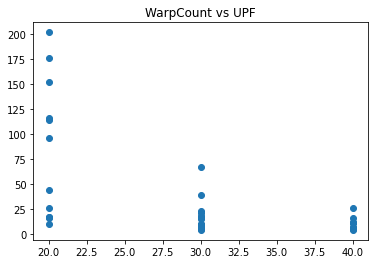

In [293]:
x=df['Warpcount(Ne)']
y=df['UPF']
plt.scatter(x,y)
plt.title('WarpCount vs UPF')

Text(0.5, 1.0, 'Enddensity(inch-1) vs UPF')

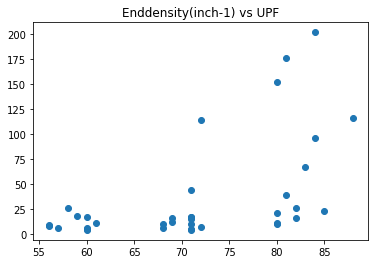

In [294]:
x=df['Enddensity(inch-1)']
y=df['UPF']
plt.scatter(x,y)
plt.title('Enddensity(inch-1) vs UPF')

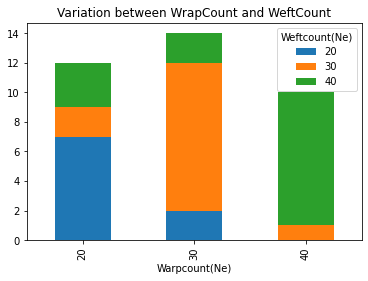

In [295]:
df.groupby(['Warpcount(Ne)','Weftcount(Ne)']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Variation between WrapCount and WeftCount')
plt.show()

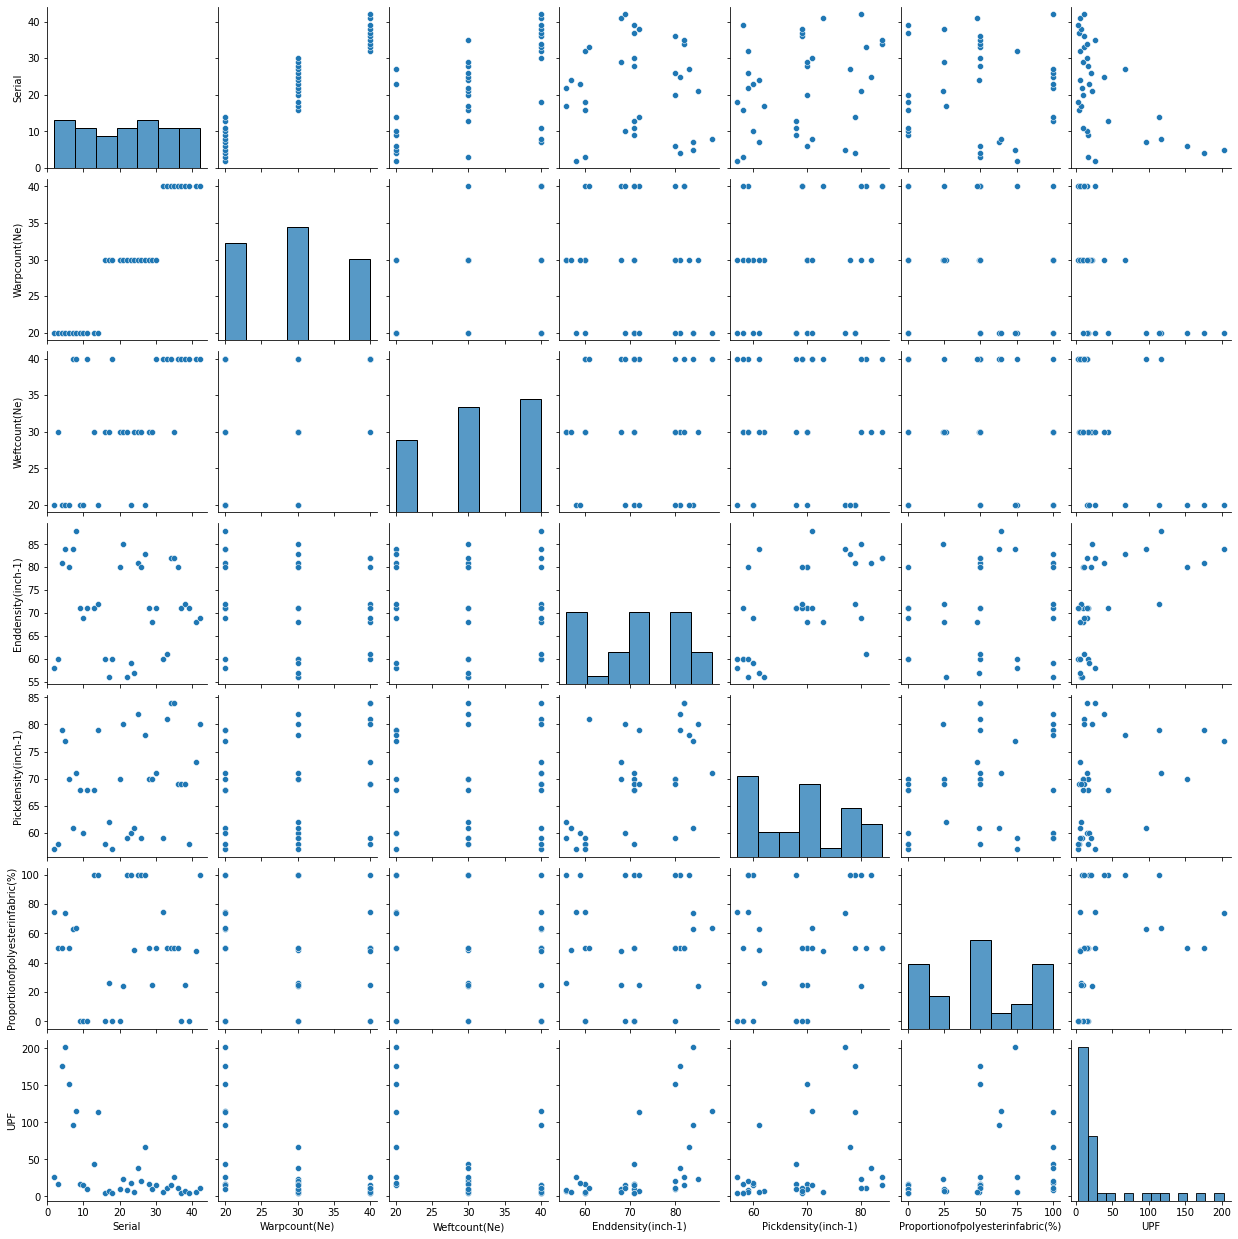

In [296]:
sns.pairplot(df)

In [297]:
l=df['Warpcount(Ne)'].value_counts()
l

30    14
20    12
40    10
Name: Warpcount(Ne), dtype: int64

Text(0.5, 1.0, 'Division of WarpCount')

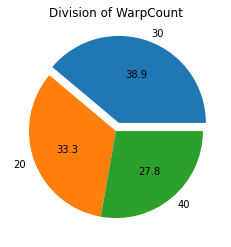

In [298]:
explode = np.zeros(len(l))
explode[l.argmax()] = 0.1
plt.pie(l,autopct='%0.1f',explode=explode,labels=['30','20','40'])
plt.title('Division of WarpCount')

In [299]:
l2=df['Weftcount(Ne)'].value_counts()
l2

40    14
30    13
20     9
Name: Weftcount(Ne), dtype: int64

Text(0.5, 1.0, 'Division of WeftCount')

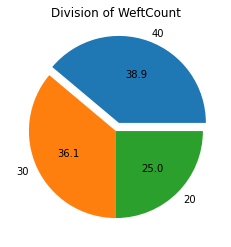

In [300]:
explode = np.zeros(len(l2))
explode[l2.argmax()] = 0.1
plt.pie(l2,autopct='%0.1f',explode=explode,labels=['40','30','20'])
plt.title('Division of WeftCount')

Text(0.5, 1.0, 'Enddensity(inch-1) variation')

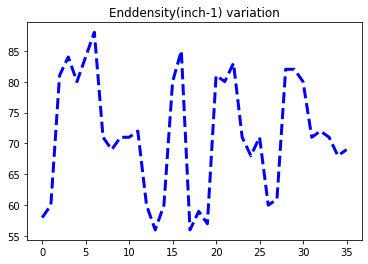

In [301]:
plt.plot(df['Enddensity(inch-1)'], color = 'blue', linewidth=3, linestyle='dashed')
plt.title('Enddensity(inch-1) variation')

Text(0.5, 1.0, 'Pickdensity(inch-1) variation')

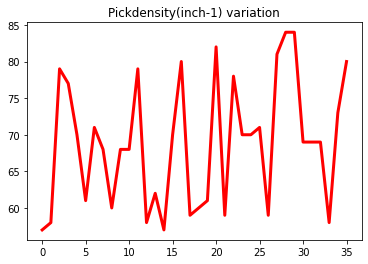

In [302]:
plt.plot(df['Pickdensity(inch-1)'], color = 'red', linewidth=3)
plt.title('Pickdensity(inch-1) variation')

Text(0.5, 1.0, 'Proportionofpolyesterinfabric(%) variation')

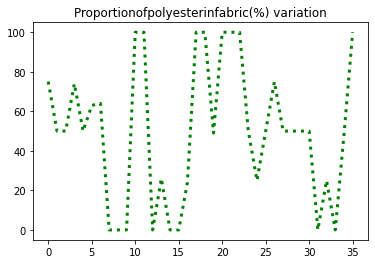

In [303]:
plt.plot(df['Proportionofpolyesterinfabric(%)'], color = 'green', linewidth=3,linestyle='dotted')
plt.title('Proportionofpolyesterinfabric(%) variation')

## Test Set

In [367]:
df1=pd.read_csv('D:/UPF Internship/UPF_test.csv')
df1

,Serial,Warpcount(Ne),Weftcount(Ne),Enddensity(inch-1),Pickdensity(inch-1),Proportionofpolyesterinfabric(%),UPF
0,1,20,20,58,59,50,23
1,12,20,20,70,67,100,75
2,15,20,40,72,72,100,33
3,19,30,30,82,82,0,11
4,31,40,40,58,59,50,5
5,40,40,40,69,68,100,9


In [368]:
#Train-Test Dataset
X=df.iloc[:,1:5]
y=df['UPF']

In [369]:
X_test=df1.iloc[:,1:5]
y_test=df1['UPF']

## Random Forest Regressor

Error at  1 is 41.73328008516305
Error at  2 is 41.32694843158235
Error at  3 is 20.235648778368375
Error at  4 is 16.82600913268899
Error at  5 is 16.444654653311108
Error at  6 is 16.94708540439045
Error at  7 is 17.538296289397493
Error at  8 is 16.910533576245705
Error at  9 is 12.160703764559956
Error at  10 is 13.613657358207114
Error at  11 is 15.343585625097896
Error at  12 is 15.575941502962309
Error at  13 is 16.070388808292854
Error at  14 is 16.529194950580195
Error at  15 is 17.867101984746526
Error at  16 is 18.124066067892528
Error at  17 is 18.501815740564723
Error at  18 is 18.484227510682363
Error at  19 is 19.20605571629129
Error at  20 is 19.40525057812962
Error at  21 is 19.92614860772429
Error at  22 is 20.641118795355233
Error at  23 is 20.700857949581973
Error at  24 is 21.266136302599513
Error at  25 is 21.822606016086468
Error at  26 is 22.376248546479072
Error at  27 is 22.55786138348705
Error at  28 is 23.42793172036058
Error at  29 is 23.87584314427824
Mini

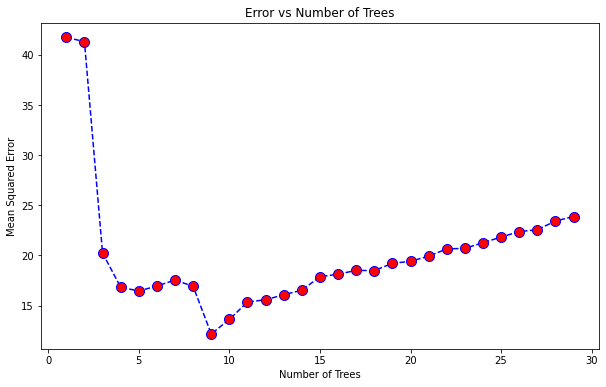

In [370]:
#Determination of number of trees for which error will be least
error=[]
for i in range(1,30,1):
    RFReg= RandomForestRegressor(n_estimators=i,random_state=0)
    RFReg.fit(X,y)
    y_predict=RFReg.predict(X_test)
    error_exact=np.sqrt(metrics.mean_squared_error(y_test, y_predict))
    print('Error at ',i,'is',error_exact)
    error.append(error_exact)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
print("Minimum error:",min(error),"at Number of Trees=",error.index(min(error))+1)


Score at  1 is 0.010817520441395168
Score at  2 is 0.6864764849242304
Score at  3 is 0.8013144701616155
Score at  4 is 0.7902030012293357
Score at  5 is 0.7453121618327612
Score at  6 is 0.745980153806981
Score at  7 is 0.7371084769162402
Score at  8 is 0.7468152831116608
Score at  9 is 0.7401006747814012
Score at  10 is 0.7401006747814012
Score at  11 is 0.7401006747814012
Score at  12 is 0.7401006747814012
Score at  13 is 0.7401006747814012
Score at  14 is 0.7401006747814012
Score at  15 is 0.7401006747814012
Score at  16 is 0.7401006747814012
Score at  17 is 0.7401006747814012
Score at  18 is 0.7401006747814012
Score at  19 is 0.7401006747814012
Score at  20 is 0.7401006747814012
Score at  21 is 0.7401006747814012
Score at  22 is 0.7401006747814012
Score at  23 is 0.7401006747814012
Score at  24 is 0.7401006747814012
Score at  25 is 0.7401006747814012
Score at  26 is 0.7401006747814012
Score at  27 is 0.7401006747814012
Score at  28 is 0.7401006747814012
Score at  29 is 0.7401006747

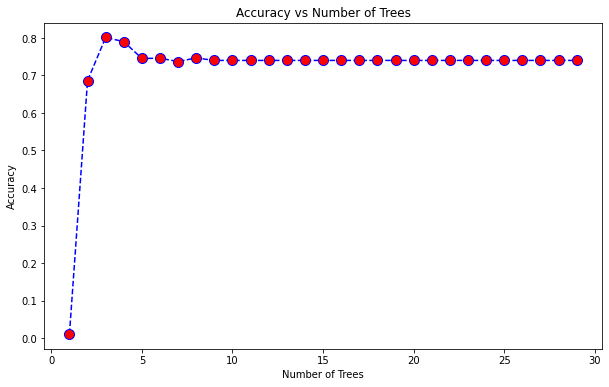

In [371]:
error=[]
for i in range(1,30,1):
    RFReg= RandomForestRegressor(n_estimators=9,random_state=0, max_depth=i)
    RFReg.fit(X,y)
    y_predict=RFReg.predict(X_test)
    exact_r2=RFReg.score(X_test,y_test)
    print('Score at ',i,'is',exact_r2)
    error.append(exact_r2)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
print("Acuuracy:",max(error),"at Number of Trees=",error.index(max(error))+1)

In [372]:
RFReg= RandomForestRegressor(n_estimators=9,random_state=0, max_depth=3)
RFReg
#criterian=squared error
#max_depth=None 
#min_samples_split=2
#min_samples_leaf=1
#min_weight_fraction_leaf=0.0
#max_features='auto'
#max_leaf_nodes=None
#random_state=None
#max_samples=None

RandomForestRegressor(max_depth=3, n_estimators=9, random_state=0)

In [373]:
RFReg.fit(X,y)

RandomForestRegressor(max_depth=3, n_estimators=9, random_state=0)

In [374]:
y_predict=RFReg.predict(X_test)

[ 22.88888889  18.16514161 164.5        176.74074074 128.87407407
 101.58518519  87.0691358   53.05555556  18.35185185  16.56856042
  21.25156137  94.72222222   9.20052671   9.20052671   8.15209366
  17.31268804  28.29100529   9.20052671  14.85555556   9.20052671
  24.6031746   16.79634817 105.22486772  12.71268804  10.43538509
   9.58524264   8.15209366   9.38695205  19.45985619  22.58730159
  13.66890277   8.35038426   8.35038426   8.35038426   9.38695205
   9.38695205]


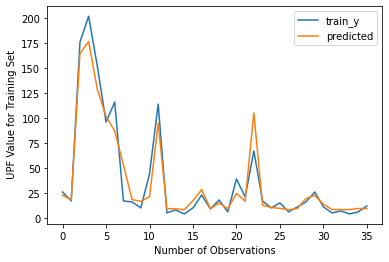

In [375]:
y_train_predict=RFReg.predict(X)
print(y_train_predict)
plt.plot(range(0,36), y, label = "train_y")
plt.plot(range(0,36), y_train_predict, label = "predicted")
plt.xlabel("Number of Observations")
plt.ylabel(" UPF Value for Training Set")
plt.legend()
plt.show()

In [376]:
np.corrcoef(y,y_train_predict)

array([[1.        , 0.96851441],
       [0.96851441, 1.        ]])

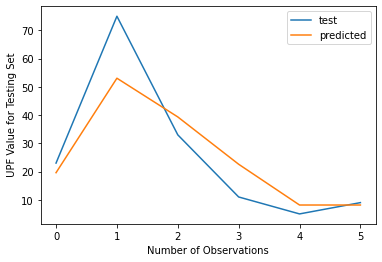

In [377]:
plt.plot(range(0,6), y_test, label = "test")
plt.plot(range(0,6), y_predict, label = "predicted")
plt.xlabel("Number of Observations")
plt.ylabel(" UPF Value for Testing Set")
plt.legend()
plt.show()

In [378]:
np.corrcoef(y_test,y_predict)

array([[1.        , 0.92882685],
       [0.92882685, 1.        ]])

In [379]:
r2_score=RFReg.score(X_test,y_test)
print('R2_score:',r2_score *100)

R2_score: 80.13144701616154


In [380]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 7.879934879934879
Mean Squared Error: 113.05206647804074
Root Mean Squared Error: 10.632594531817752


### Visualisation of the Decision Tree

In [318]:
feature_list=list(X.columns)
tree = RFReg.estimators_[8]
export_graphviz(tree, out_file ='tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

## Random Forest Classifier

### Data Conversion

In [404]:
df=pd.read_csv('D:/UPF Internship/UPF_train.csv')

In [405]:
def convertUPF(X):
    for i in range(0,36,1):
        if X['UPF'][i]>0 and X['UPF'][i]<=50:
            X['UPF'][i]=1
        else:
            X['UPF'][i]=0
    return X

In [406]:
df_classi=convertUPF(df)
df_classi

,Serial,Warpcount(Ne),Weftcount(Ne),Enddensity(inch-1),Pickdensity(inch-1),Proportionofpolyesterinfabric(%),UPF
0,2,20,20,58,57,75,1
1,3,20,30,60,58,50,1
2,4,20,20,81,79,50,0
3,5,20,20,84,77,74,0
4,6,20,20,80,70,50,0
5,7,20,40,84,61,63,0
6,8,20,40,88,71,64,0
7,9,20,20,71,68,0,1
8,10,20,20,69,60,0,1
9,11,20,40,71,68,0,1


In [407]:
df1=pd.read_csv('D:/UPF Internship/UPF_test.csv')
df1.head()

,Serial,Warpcount(Ne),Weftcount(Ne),Enddensity(inch-1),Pickdensity(inch-1),Proportionofpolyesterinfabric(%),UPF
0,1,20,20,58,59,50,23
1,12,20,20,70,67,100,75
2,15,20,40,72,72,100,33
3,19,30,30,82,82,0,11
4,31,40,40,58,59,50,5


In [408]:
def convertUPF(X):
    for i in range(0,6,1):
        if X['UPF'][i]>0 and X['UPF'][i]<=50:
            X['UPF'][i]=1
        else:
            X['UPF'][i]=0
    return X

In [409]:
df_classi_test=convertUPF(df1)
df_classi_test

,Serial,Warpcount(Ne),Weftcount(Ne),Enddensity(inch-1),Pickdensity(inch-1),Proportionofpolyesterinfabric(%),UPF
0,1,20,20,58,59,50,1
1,12,20,20,70,67,100,0
2,15,20,40,72,72,100,1
3,19,30,30,82,82,0,1
4,31,40,40,58,59,50,1
5,40,40,40,69,68,100,1


In [410]:
#Train-Test Dataset
X=df_classi.iloc[:,1:5]
y=df_classi['UPF']
X_test=df_classi_test.iloc[:,1:5]
y_test=df_classi_test['UPF']


Accuracy at  1 is 0.6666666666666666
Accuracy at  2 is 0.6666666666666666
Accuracy at  3 is 0.6666666666666666
Accuracy at  4 is 0.6666666666666666
Accuracy at  5 is 0.6666666666666666
Accuracy at  6 is 0.6666666666666666
Accuracy at  7 is 0.6666666666666666
Accuracy at  8 is 0.6666666666666666
Accuracy at  9 is 0.8333333333333334
Accuracy at  10 is 0.8333333333333334
Accuracy at  11 is 0.8333333333333334
Accuracy at  12 is 0.8333333333333334
Accuracy at  13 is 0.8333333333333334
Accuracy at  14 is 0.8333333333333334
Accuracy at  15 is 0.8333333333333334
Accuracy at  16 is 0.8333333333333334
Accuracy at  17 is 0.8333333333333334
Accuracy at  18 is 0.6666666666666666
Accuracy at  19 is 0.6666666666666666
Accuracy at  20 is 0.6666666666666666
Accuracy at  21 is 0.6666666666666666
Accuracy at  22 is 0.6666666666666666
Accuracy at  23 is 0.6666666666666666
Accuracy at  24 is 0.6666666666666666
Accuracy at  25 is 0.6666666666666666
Accuracy at  26 is 0.6666666666666666
Accuracy at  27 is 0.

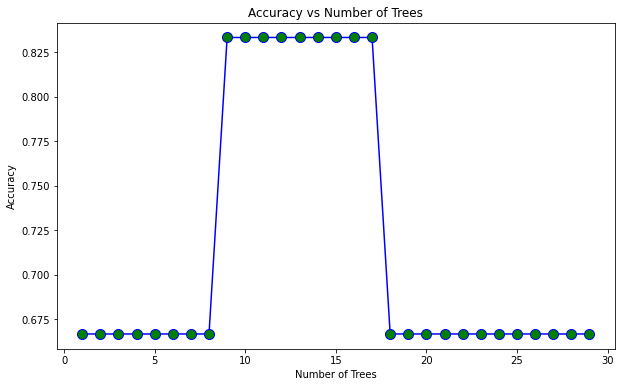

In [411]:
#Determination of Number of Trees for maximum accuracy
acc1=[]
for i in range(1,30,1):
    RFClas= RandomForestClassifier(n_estimators=i,criterion = 'entropy',random_state=0)
    RFClas.fit(X,y)
    y_predict=RFClas.predict(X_test)
    acc=RFClas.score(X_test,y_test)
    print('Accuracy at ',i,'is',acc)
    acc1.append(acc)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30),acc1,color='blue', linestyle='solid',marker='o',markerfacecolor='green', markersize=10)
plt.title('Accuracy vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
print("Maximum accuracy",max(acc1),"at Number of trees",acc1.index(max(acc1))+1)


Accuracy at  1 is 0.8333333333333334
Accuracy at  2 is 0.8333333333333334
Accuracy at  3 is 0.8333333333333334
Accuracy at  4 is 0.8333333333333334
Accuracy at  5 is 0.8333333333333334
Accuracy at  6 is 0.8333333333333334
Accuracy at  7 is 0.8333333333333334
Accuracy at  8 is 0.8333333333333334
Accuracy at  9 is 0.8333333333333334
Accuracy at  10 is 0.8333333333333334
Accuracy at  11 is 0.8333333333333334
Accuracy at  12 is 0.8333333333333334
Accuracy at  13 is 0.8333333333333334
Accuracy at  14 is 0.8333333333333334
Accuracy at  15 is 0.8333333333333334
Accuracy at  16 is 0.8333333333333334
Accuracy at  17 is 0.8333333333333334
Accuracy at  18 is 0.8333333333333334
Accuracy at  19 is 0.8333333333333334
Accuracy at  20 is 0.8333333333333334
Accuracy at  21 is 0.8333333333333334
Accuracy at  22 is 0.8333333333333334
Accuracy at  23 is 0.8333333333333334
Accuracy at  24 is 0.8333333333333334
Accuracy at  25 is 0.8333333333333334
Accuracy at  26 is 0.8333333333333334
Accuracy at  27 is 0.

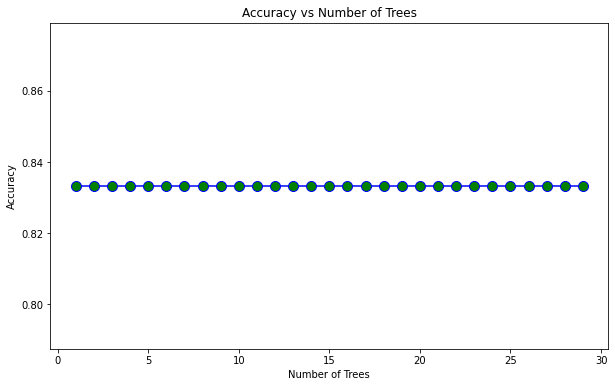

In [412]:
#Determination of Number of Trees for maximum accuracy
acc1=[]
for i in range(1,30,1):
    RFClas= RandomForestClassifier(n_estimators=9,criterion = 'entropy',random_state=0,max_depth=i)
    RFClas.fit(X,y)
    y_predict=RFClas.predict(X_test)
    acc=RFClas.score(X_test,y_test)
    print('Accuracy at ',i,'is',acc)
    acc1.append(acc)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30),acc1,color='blue', linestyle='solid',marker='o',markerfacecolor='green', markersize=10)
plt.title('Accuracy vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
print("Maximum accuracy",min(acc1),"at Number of trees",acc1.index(max(acc1))+1)


In [416]:
RFClas= RandomForestClassifier(n_estimators=2,criterion = 'entropy',random_state=1)
RFClas.fit(X,y)
y_predict=RFClas.predict(X_test)

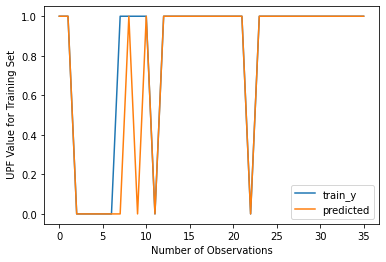

In [420]:
y_predict_train_clas=RFClas.predict(X)
plt.plot(range(0,36), y, label = "train_y")
plt.plot(range(0,36), y_predict_train_clas, label = "predicted")
plt.xlabel("Number of Observations")
plt.ylabel(" UPF Value for Training Set")
plt.legend()
plt.show()

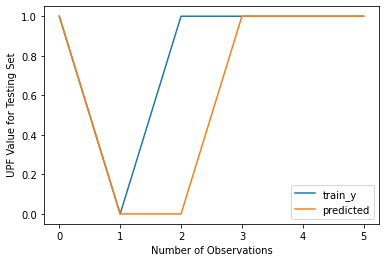

In [418]:
plt.plot(range(0,6), y_test, label = "train_y")
plt.plot(range(0,6), y_predict, label = "predicted")
plt.xlabel("Number of Observations")
plt.ylabel(" UPF Value for Testing Set")
plt.legend()
plt.show()

In [414]:
print('Accuracy Score:',RFClas.score(X_test,y_test)*100)

Accuracy Score: 83.33333333333334


### Visualisation of one decision tree from this Random Forest

In [394]:
feature_list=list(X.columns)
tree = RFClas.estimators_[1]
export_graphviz(tree, out_file ='tree_class.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree_class.dot')
graph.write_png('tree_class.png')

### Evaluation

In [395]:
df3=pd.read_csv('D:/UPF Internship/UPF_vali.csv')
df3

,Serial,Warpcount(Ne),Weftcount(Ne),Enddensity(inch-1),Pickdensity(inch-1),Proportionofpolyesterinfabric(%),UPF
0,2,20,20,58,57,75,26
1,3,20,30,60,58,50,17
2,4,20,20,81,79,50,176
3,5,20,20,84,77,74,202
4,6,20,20,80,70,50,152
5,7,20,40,84,61,63,96
6,8,20,40,88,71,64,116
7,9,20,20,71,68,0,17
8,10,20,20,69,60,0,16
9,11,20,40,71,68,0,10


In [396]:
def convertUPF(X):
    for i in range(0,42,1):
        if X['UPF'][i]>0 and X['UPF'][i]<=50:
            X['UPF'][i]=1
        else:
            X['UPF'][i]=0
    return X

In [397]:
df_final3=convertUPF(df3)
df_final3

,Serial,Warpcount(Ne),Weftcount(Ne),Enddensity(inch-1),Pickdensity(inch-1),Proportionofpolyesterinfabric(%),UPF
0,2,20,20,58,57,75,1
1,3,20,30,60,58,50,1
2,4,20,20,81,79,50,0
3,5,20,20,84,77,74,0
4,6,20,20,80,70,50,0
5,7,20,40,84,61,63,0
6,8,20,40,88,71,64,0
7,9,20,20,71,68,0,1
8,10,20,20,69,60,0,1
9,11,20,40,71,68,0,1


In [398]:
X_vali=df_final3.iloc[:,1:5]
y_vali=df_final3['UPF']

In [403]:
from sklearn.model_selection import KFold
for i in range(2,15):
    cv = KFold(n_splits=i,random_state=1,shuffle=True)
    scores = cross_val_score(RFClas, X, y, scoring='accuracy', cv=cv)
    print('Cross Validation Scores for',i,'splits',scores.mean()*100)

Cross Validation Scores for 2 splits 86.11111111111111
Cross Validation Scores for 3 splits 94.44444444444446
Cross Validation Scores for 4 splits 88.88888888888889
Cross Validation Scores for 5 splits 80.0
Cross Validation Scores for 6 splits 86.11111111111111
Cross Validation Scores for 7 splits 91.42857142857143
Cross Validation Scores for 8 splits 81.875
Cross Validation Scores for 9 splits 86.11111111111111
Cross Validation Scores for 10 splits 86.66666666666666
Cross Validation Scores for 11 splits 84.84848484848484
Cross Validation Scores for 12 splits 83.33333333333334
Cross Validation Scores for 13 splits 84.61538461538461
Cross Validation Scores for 14 splits 80.95238095238095


In [400]:
cv = KFold(n_splits=3,random_state=1,shuffle=True)
scores = cross_val_score(RFClas, X, y, scoring='accuracy', cv=cv)
print(scores)

[1.         1.         0.83333333]


In [401]:
kfold = KFold(3, True, 1)
for train, test in kfold.split(X):
    print('train: %s, test: %s' % (train, test))

train: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 18 20 22 24 25 31 32 35], test: [ 3 17 19 21 23 26 27 28 29 30 33 34]
train: [ 0  1  3  5  7  8  9 11 12 13 15 16 17 19 21 23 26 27 28 29 30 33 34 35], test: [ 2  4  6 10 14 18 20 22 24 25 31 32]
train: [ 2  3  4  6 10 14 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34], test: [ 0  1  5  7  8  9 11 12 13 15 16 35]


C:\Users\Kathakoli\anaconda3\envs\env_dlib\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [402]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5

    accuracy                           0.83         6
   macro avg       0.75      0.90      0.78         6
weighted avg       0.92      0.83      0.85         6



In [341]:
cf_matrix=confusion_matrix(y_test,y_predict)
cf_matrix

array([[1, 0],
       [1, 4]], dtype=int64)

<AxesSubplot:>

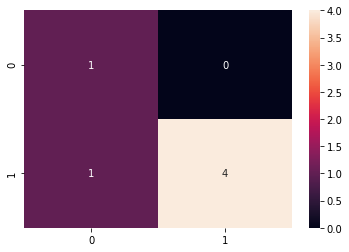

In [342]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)